# First model

## Autoencoder

Features:

* eth_source
* eth_dst 
* ip_src 
* ip_dst
* ip.len
* ip.tos 
* ip.ttl
* ip.version
* flag_type ('FIN', 'SYN', 'RST', 'PSH', 'ACK', 'URG', 'ECE','CWR', 'UNK')
* length
* load (first 20 bytes)
* load.count
* type of ip.src
* type of ip.dst
* protocol (tcp/udp)
* protocol.dport
* protocol.sport

Scaling: Standard Scalar

In [1]:
import pandas as pd
import numpy as np
import random
from preprocess_df import process_df
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

normal_df = pd.read_csv('../data/normal1.csv')
processed_normal = process_df(normal_df)

attack_df = pd.read_csv('../data/attack1.csv')
processed_attack = process_df(attack_df)

In [3]:
processed_normal.columns

Index(['octet_1_eth_dst', 'octet_2_eth_dst', 'octet_3_eth_dst',
       'octet_4_eth_dst', 'octet_5_eth_dst', 'octet_6_eth_dst',
       'octet_1_eth_src', 'octet_2_eth_src', 'octet_3_eth_src',
       'octet_4_eth_src', 'octet_5_eth_src', 'octet_6_eth_src',
       'octet_1_ip_src', 'octet_2_ip_src', 'octet_3_ip_src', 'octet_4_ip_src',
       'octet_1_ip_dst', 'octet_2_ip_dst', 'octet_3_ip_dst', 'octet_4_ip_dst',
       'length', 'eth.type', 'ip.version', 'ip.proto', 'ip.len', 'ip.ihl',
       'ip.tos', 'ip.ttl', 'load.count', 'FIN', 'SYN', 'RST', 'PSH', 'ACK',
       'URG', 'ECE', 'CWR', 'UNK', 'source_docker_bridge', 'source_dns',
       'source_service', 'source_pod', 'source_external',
       'destination_docker_bridge', 'destination_dns', 'destination_service',
       'destination_pod', 'destination_external', 'load_0', 'load_1', 'load_2',
       'load_3', 'load_4', 'load_5', 'load_6', 'load_7', 'load_8', 'load_9',
       'load_10', 'load_11', 'load_12', 'load_13', 'load_14', 'load_1

In [4]:
x_normal_train, x_normal_test = train_test_split(processed_normal.values, test_size=0.2, random_state=42)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(40, input_dim=processed_normal.values.shape[1], activation='ReLU'))
model.add(Dense(4, activation='ReLU'))
model.add(Dense(40, activation='ReLU'))
model.add(Dense(processed_normal.values.shape[1]))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_normal_train,x_normal_train,verbose=1,epochs=30)
model.save("model_1_new")

Epoch 1/30


2022-03-26 15:09:25.179085: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3514/3514 [==============================] - 14s 4ms/step - loss: 0.2224
Epoch 2/30
3514/3514 [==============================] - 13s 4ms/step - loss: 0.1511
Epoch 3/30
3514/3514 [==============================] - 13s 4ms/step - loss: 0.1374
Epoch 4/30
3514/3514 [==============================] - 13s 4ms/step - loss: 0.1301
Epoch 5/30
3514/3514 [==============================] - 13s 4ms/step - loss: 0.1258
Epoch 6/30
3514/3514 [==============================] - 13s 4ms/step - loss: 0.1225
Epoch 7/30
3514/3514 [==============================] - 13s 4ms/step - loss: 0.1199
Epoch 8/30
3514/3514 [==============================] - 13s 4ms/step - loss: 0.1179
Epoch 9/30
3514/3514 [==============================] - 13s 4ms/step - loss: 0.1162
Epoch 10/30
3514/3514 [==============================] - 13s 4ms/step - loss: 0.1147
Epoch 11/30
3514/3514 [==============================] - 13s 4ms/step - loss: 0.1136
Epoch 12/30
3514/3514 [==============================] - 13s 4ms/step - loss: 0.1127


2022-03-26 15:15:51.481494: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: model_1_new/assets


INFO:tensorflow:Assets written to: model_1_new/assets


In [7]:
from sklearn import metrics
pred_normal_train = model.predict(x_normal_train)
print(np.sqrt(metrics.mean_squared_error(pred_normal_train,x_normal_train)))

pred_normal_test = model.predict(x_normal_test)
print(np.sqrt(metrics.mean_squared_error(pred_normal_test,x_normal_test)))

2022-03-26 15:19:04.486962: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


0.32354723251546713
0.3248214245621417


In [18]:
pred_normal = model.predict(processed_normal.values)

<AxesSubplot:>

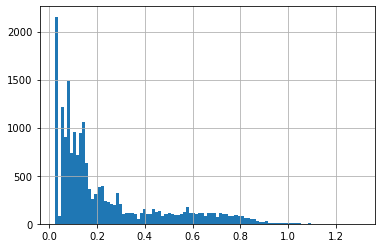

In [28]:
normal_score_list = [0]*pred_normal.shape[0]

normal_df['score'] = 0

random_index = [random.randint(0, pred_normal.shape[0]) for x in range(20000)]

for index in random_index:
    normal_score_list[index]= (metrics.mean_squared_error(pred_normal[index],processed_normal.values[index], squared=False))

normal_df['score'] = normal_score_list

copy_normal_df = normal_df[normal_df['score'] !=0]

copy_normal_df['score'].hist(bins = 100)

In [ ]:
pred_attack = model.predict(processed_attack.values)
attack_score_list = [0]*pred_attack.shape[0]

attack_df['score'] = 0

random_index = [random.randint(0, pred_normal.shape[0]) for x in range(40000)]

for index in random_index:
    normal_score_list[index]= (metrics.mean_squared_error(pred_normal[index],processed_normal.values[index], squared=False))

attack_df['score'] = normal_score_list

copy_attack_df = normal_df[normal_df['score'] !=0]

copy_attack_df['score'].hist(bins = 100)

In [ ]:


score_list = []
for index, x in enumerate(pred_attack):
    score_list.append(np.sqrt(metrics.mean_squared_error(pred_attack[index],processed_attack.values[index])))

attack_df['score'] = score_list
attack_df['score'].hist(bins = 100)

In [ ]:
nmap_df = attack_df[attack_df["ip.dst"] == '89.100.107.148']
nmap_df['score'].hist(bins = 100)

In [ ]:
normal_df['score'].describe().apply(lambda x: format(x, 'f'))

In [ ]:
attack_df['score'].describe().apply(lambda x: format(x, 'f'))

In [ ]:
attack_df['score'].quantile(0.71)

In [ ]:
pred_normal = []

In [19]:
pred_normal.shape

(140538, 72)

In [20]:
model.evaluate(pred_normal)

 130/4392 [..............................] - ETA: 5s - loss: 0.0000e+00

2022-03-26 15:49:55.495407: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4392/4392 [==============================] - 5s 1ms/step - loss: 0.0000e+00


0.0